## Reading Time Series Data and storing it as TS Object

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

#### Converting data in .csv file into time-series data
- The read_csv() function of pandas has few more attributes, which will help us to convert the data into time-series data for further analysis.
    - parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
    - index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
    - date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [6]:
# converting into time-series data

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
parse_data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], 
                         index_col='Month',date_parser=dateparse)
parse_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
parse_data.shape

(144, 1)

In [8]:
# Now the data has time object as index and #Passengers as the column.
parse_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
# Since only one column is there (#passengers), we can convert this to 
# pandas Series and use 

ts = parse_data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [10]:
# Extract the data using Series
ts['1949-05-01']

121

In [11]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [12]:
# Extract range of data:
ts['1949-01-01':'1949-05-01']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
ts[:'1949-06-01']  #note that last index is included unlike numeric indexing

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [14]:
#Extract data for entire year
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

## TS Data Visualization

Text(0, 0.5, 'Number of Passengers')

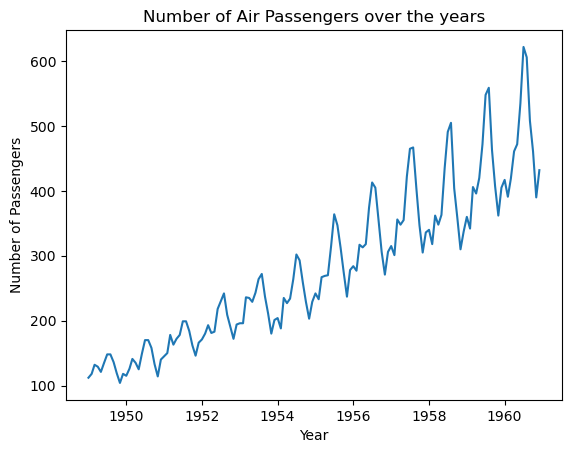

In [15]:
#Plot the data and observe the trend
plt.plot(ts)
plt.title('Number of Air Passengers over the years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

### Plotting year-wise data
It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

The AirPassenger dataset spans 12 years. We can group data by year and create a line plot for each year for direct comparison.

The example below shows how to do this.

The groups are then enumerated and the observations for each year are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

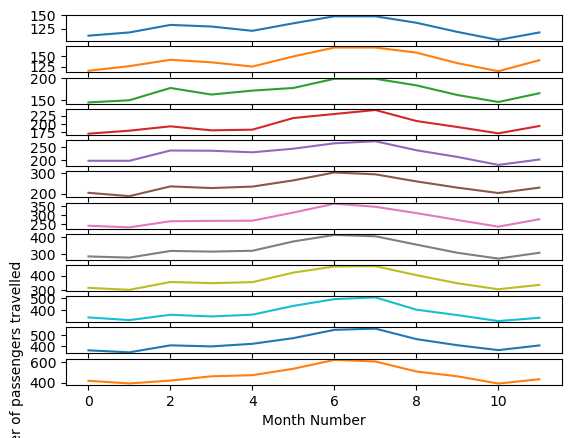

<Figure size 1500x800 with 0 Axes>

In [16]:
from pandas import Grouper

groups = ts.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.xlabel('Month Number')
plt.ylabel('Number of passengers travelled')
plt.figure(figsize=(15,8))
plt.show()

In the above graph, each subplot indicates one year data.

### Time Series Box Plot
- This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. 

<Axes: >

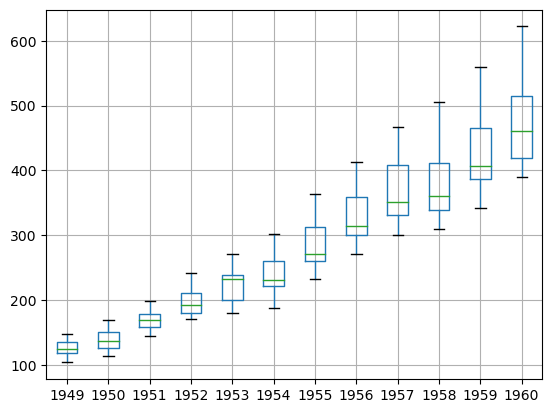

In [17]:
years.boxplot()

### Time Series Histogram Plot
- Another important visualization is of the distribution of observations themselves.
- This means a plot of the values without the temporal ordering.
    - This will help us to check the distribution of observations.
    - And, gives an idea about type of data transform to beperformed.

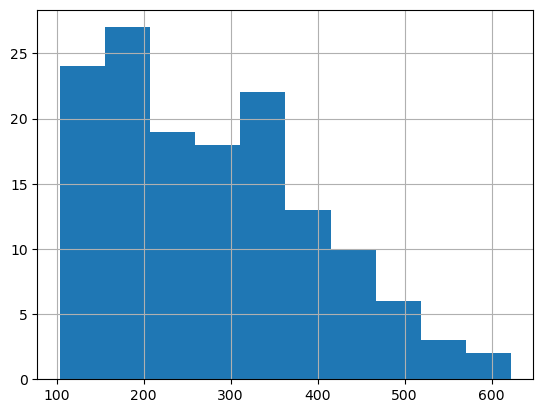

In [18]:
ts.hist()
plt.show()

###  Decomposing:
- Time series decomposition is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:
    - Seasonal: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
    - Trend: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
    - Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

- For more details, read: https://anomaly.io/seasonal-trend-decomposition-in-r/ and https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- Here,  both trend and seasonality are modeled separately and the remaining part of the series is returned.


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

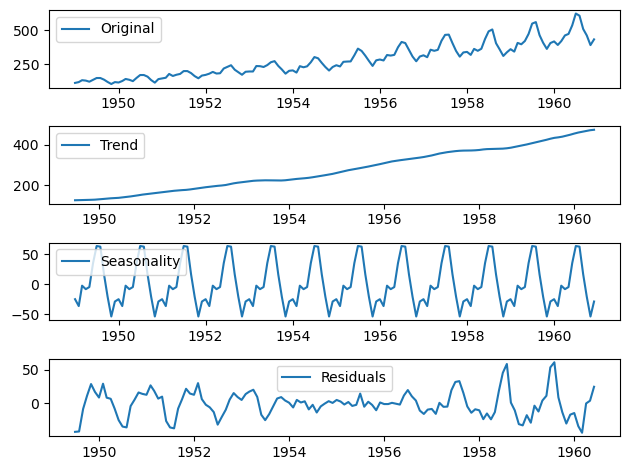

In [20]:
'''
The subplot() takes argument as either a 3-digit integer or three separate 
integers describing the position of the subplot. If the three integers are 
nrows, ncols, and index in order, the subplot will take the index position 
on a grid with nrows rows and ncols columns. index starts at 1 in the upper 
left corner and increases to the right.
'''

plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.

## ARIMA Model

#### Step 1: Checking the data for Stationarity
- One way is looking at the plot of the data - check whether it looks like a white noise
- Second method is - a statstical test called as Augmented Dickey-Fuller test

##### Plot the data to check for Stationarity

Text(0, 0.5, 'Number of Passengers')

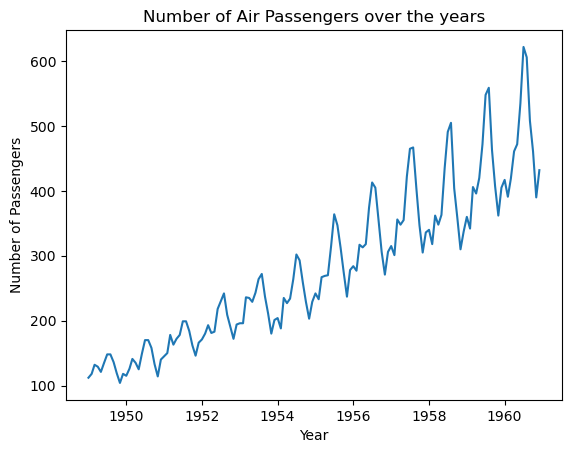

In [21]:
plt.plot(ts)
plt.title('Number of Air Passengers over the years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

It is observed from the above graph that the time series data has overall increasing trend with few seasonal variations. So, the data seems to be non-stationary.

##### Apply Augmented Dickey-Fuller test to check the data for stationarity
- We will take Null Hypothesis as: The time series data is stationary.
- Alternative Hypothesis is: The Time series data is non-stationary.
- If the test-statistic value of Dickey Fuller test is lesser than the critical value (at 1% or 5% or 10% confidence interval), then we can say that null hypothesis is accepted at a particular confidence level.
- If the test-statistic is greater, we have to reject the null hypothesis.

In [22]:
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller test

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [23]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


*The Test Statistic is greater than critical values at all confidence intervals. This clearly indicates that data is non-stationary*

#### Step 2: Making the data for Stationarity
- One of the tricks to reduce trend can be transformation. For example, in the current example, we can clearly see that the there is a significant positive trend. So we can apply log-transformation which penalize higher values more than smaller values. 
- Then we can go for differencing the time-series data.


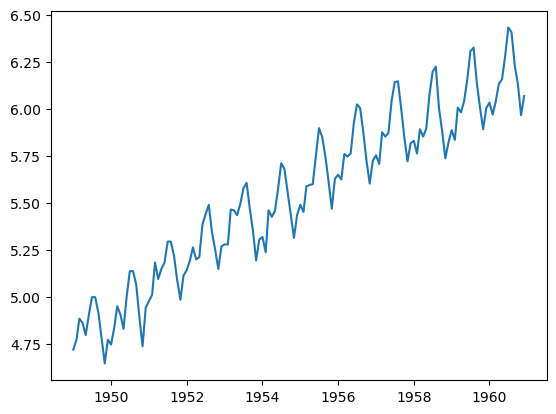

In [24]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [25]:
ts_log_diff = ts_log.diff(periods=1)
ts_log_diff.head(8)

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
Name: #Passengers, dtype: float64

In [26]:
ts_log_diff.dropna(inplace=True)

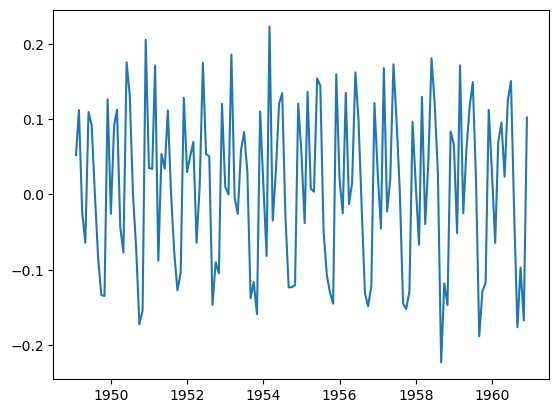

In [27]:
plt.plot(ts_log_diff)

In [28]:
test_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


###### *From the above output, we can say that data became stationary at 10% level of significance (or 90% confidence)*
*And the order of differencing, d in ARIMA model is found to be 1.*


#### Step 3: Plot PACF and ACF
***ACF***
- It is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
- In simple terms, it describes how well the present value of the series is related with its past values. 
- A time series can have components like trend, seasonality, cyclic and residual. 
- ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

***PACF***
- PACF is a partial auto-correlation function. 
- Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 
- So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. 
- Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.




We need to plot PACF and ACF to get autocorrelation order p and Moving Average lag q, respectively.

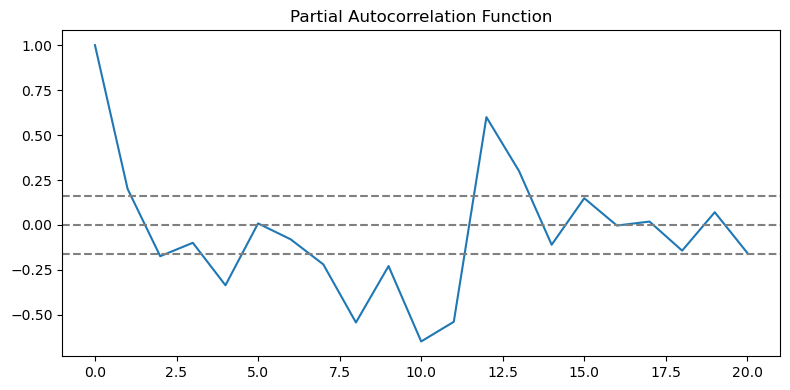

In [29]:
from statsmodels.tsa.stattools import acf, pacf

#Plot PACF:
#plt.subplot(122)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.figure(figsize=(8,4))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'Autocorrelation Function')

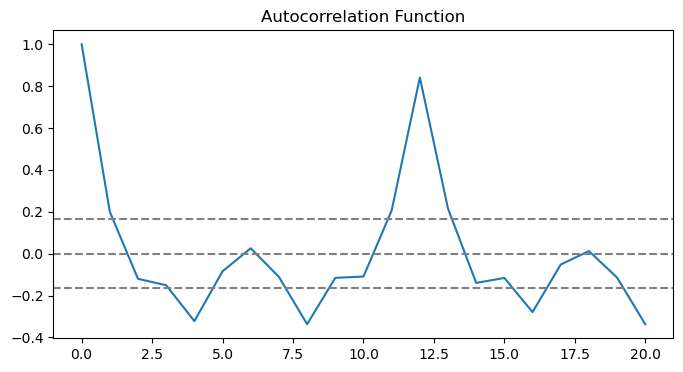

In [30]:
#Plot ACF: 

#plt.subplot(121) 
lag_acf = acf(ts_log_diff, nlags=20)
plt.figure(figsize=(8,4))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [36]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

In these plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

In [37]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [55]:
# Fit the ARIMA model
order = (2, 1, 2)  # Replace p, d, q with appropriate values
model = ARIMA(ts, order=order)
result = model.fit()

C:\Users\Idris\anaconda3_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Idris\anaconda3_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Idris\anaconda3_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Idris\anaconda3_new\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
# Generate predictions
forecast_steps = 24  # Replace with the number of steps you want to forecast
forecast = result.get_forecast(steps=forecast_steps)

In [63]:
forecast.predicted_mean

1961-01-01    439.855334
1961-02-01    465.297243
1961-03-01    500.666594
1961-04-01    535.971411
1961-05-01    561.688345
1961-06-01    571.311188
1961-07-01    562.970191
1961-08-01    539.727201
1961-09-01    508.526791
1961-10-01    478.147074
1961-11-01    456.748318
1961-12-01    449.698968
1962-01-01    458.253156
1962-02-01    479.398095
1962-03-01    506.859700
1962-04-01    532.942785
1962-05-01    550.671631
1962-06-01    555.639739
1962-07-01    547.082814
1962-08-01    527.920523
1962-09-01    503.802320
1962-10-01    481.459794
1962-11-01    466.841419
1962-12-01    463.542853
Freq: MS, Name: predicted_mean, dtype: float64

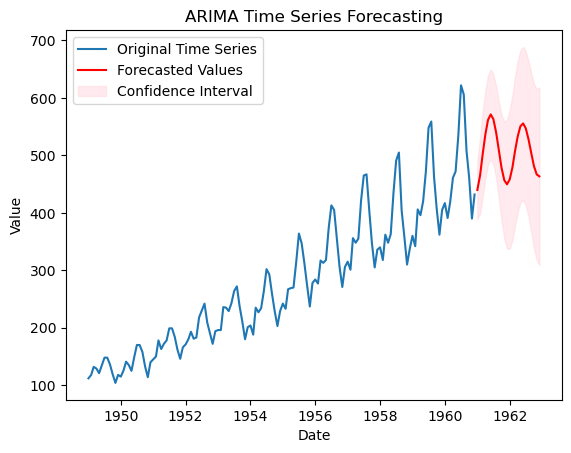

In [64]:
# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original time series and the forecasted values
plt.plot(ts.index, ts, label='Original Time Series')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecasted Values')

# Get the column names dynamically
lower_col = conf_int.columns[0]
upper_col = conf_int.columns[1]

# Fill between the lower and upper confidence intervals
plt.fill_between(conf_int.index, conf_int[lower_col], conf_int[upper_col], color='pink', alpha=0.3, label='Confidence Interval')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Time Series Forecasting')
plt.show()


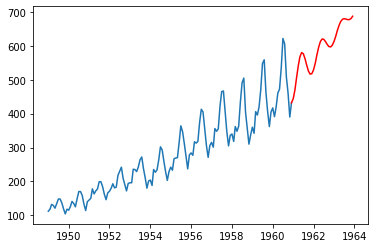

In [43]:
#plt.figure(figsize=(10,6))
plt.plot(updated_data[:'1960'])
plt.plot(updated_data['1960-12-01':], color='red')